# Processmento dos dados de CTD do WOCE
- Henrique P. P. Pereira
- 2017/07/27

In [1]:
# import libraries

import os
import numpy as np
import zipfile
import xray
import matplotlib.pyplot as plt

In [2]:
# pathname of zip files

pathname = os.environ['HOME'] + '/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/'
pathname

'/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/'

In [3]:
# list and unzip zip files

listzip = []
for l in listzip:
    if l.endswith('.zip'):
        zip_ref = zipfile.ZipFile(pathname + l, 'r')
        zip_ref.extractall(pathname + l[:-4])
        zip_ref.close()

In [4]:
# list unzipped files

listpaths = []
for p in np.sort(os.listdir(pathname)):
    if p.endswith('_ctd'):
        listpaths.append(p)
listpaths[:3]

['0_a25_nc_ctd', '100_a10_2003a_nc_ctd', '101_316N20111106_nc_ctd']

In [5]:
# plot temp and salt profile and TS diagram

def fig(ds):
    
    plt.figure(figsize=(16,6))
    plt.subplot(131)
    plt.plot(ds.temperature, -ds.pressure)
    plt.xlabel('Temperature (C)')
    plt.ylabel('Depth (m)')
    plt.grid()
    plt.subplot(132)
    plt.plot(ds.salinity, -ds.pressure)
    plt.xlabel('Salinity (PSU)')
    plt.grid()
    plt.subplot(133)
    plt.plot(ds.salinity, ds.temperature, '.')
    plt.xlabel('Salinity (PSU)')
    plt.ylabel('Temperature (C)')
    plt.grid()
    
    return

#################
0_a25_nc_ctd
-----------------
/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/0_a25_nc_ctd/a25_00001_00001_ctd.nc
<xarray.Dataset>
Dimensions:         (latitude: 1, longitude: 1, pressure: 1806, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 1997-08-07T23:00:00
  * pressure        (pressure) float64 1.0 3.0 5.0 7.0 9.0 11.0 13.0 15.0 ...
  * latitude        (latitude) float64 41.5
  * longitude       (longitude) float64 -12.5
Data variables:
    pressure_QC     (pressure) int16 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    temperature     (pressure) float64 19.6 19.61 19.61 19.62 19.63 19.64 ...
    temperature_QC  (pressure) int16 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    salinity        (pressure) float64 35.97 35.97 35.97 35.97 35.97 35.97 ...
    salinity_QC     (pressure) int16 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    oxygen          (pressure) float64 227.0 226.8 224.3 226.3 225.0 221.5 ...
    oxygen_QC      

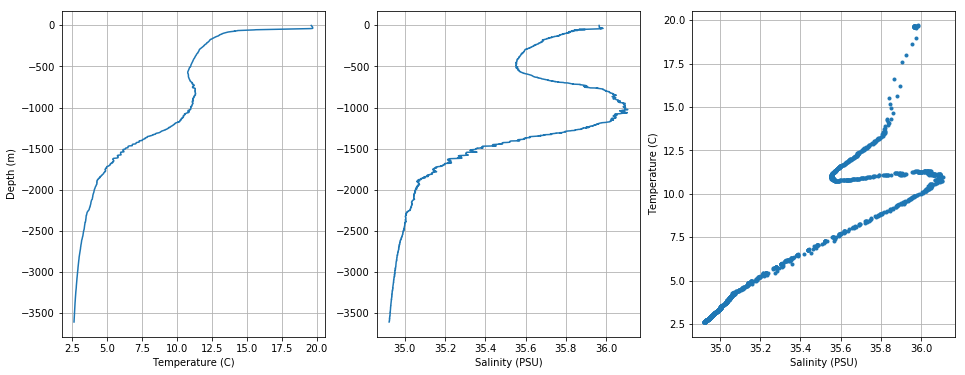

/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/0_a25_nc_ctd/a25_00002_00001_ctd.nc
<xarray.Dataset>
Dimensions:         (latitude: 1, longitude: 1, pressure: 2633, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 1997-08-08T11:16:00
  * pressure        (pressure) float64 1.0 3.0 5.0 7.0 9.0 11.0 13.0 15.0 ...
  * latitude        (latitude) float64 41.5
  * longitude       (longitude) float64 -12.49
Data variables:
    pressure_QC     (pressure) int16 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    temperature     (pressure) float64 19.73 19.73 19.73 19.72 19.72 19.71 ...
    temperature_QC  (pressure) int16 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    salinity        (pressure) float64 35.96 35.96 35.96 35.96 35.96 35.96 ...
    salinity_QC     (pressure) int16 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...
    oxygen          (pressure) float64 228.8 228.0 229.0 230.1 228.0 228.0 ...
    oxygen_QC       (pressure) int16 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

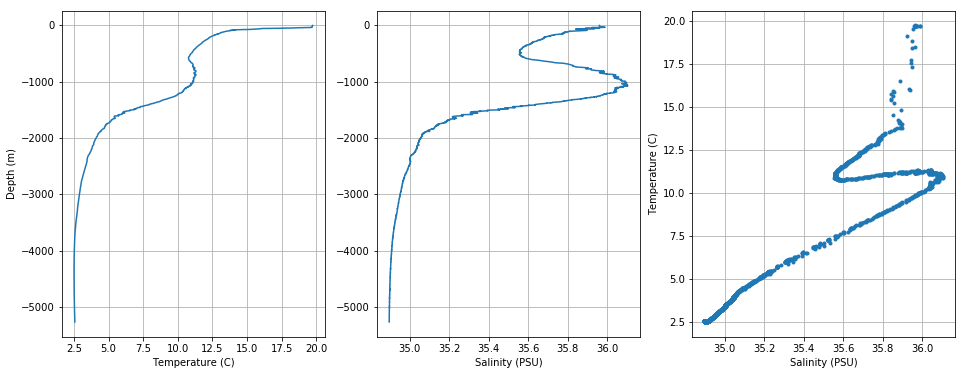

In [6]:
# describe and plot each arq for each comission

for d in listpaths[:1]:
    
    print '#################'
    print d
    print '-----------------'
    
    arqs = np.sort(os.listdir(pathname + d))
    
    for arq in arqs[:2]:
        
        pathfile = pathname + d + '/' + arq
        
        # print pathname and filename
        print pathfile
        
        # open dataset
        ds = xray.open_dataset(pathfile)
        
        # print file description
        print (ds)
        
        # plot figure
        fig(ds)
        
        plt.show()

# Interpolation WOCE CTD data to BESM vertical grid

In [7]:
# BESM vertical grid

z_besm = np.array([ 5.07150000e+00,   1.52145000e+01,   2.53575000e+01,
                    3.55005000e+01,   4.56435000e+01,   5.57865000e+01,
                    6.59295000e+01,   7.60725000e+01,   8.62155000e+01,
                    9.63585000e+01,   1.06501500e+02,   1.16644500e+02,
                    1.26787500e+02,   1.36930500e+02,   1.47073500e+02,
                    1.57216500e+02,   1.67359500e+02,   1.77502500e+02,
                    1.87645500e+02,   1.97788500e+02,   2.07931500e+02,
                    2.18074500e+02,   2.28217500e+02,   2.38930394e+02,
                    2.53621725e+02,   2.73374094e+02,   3.01482350e+02,
                    3.38860395e+02,   3.88581432e+02,   4.51287539e+02,
                    5.29733404e+02,   6.24199873e+02,   7.37042234e+02,
                    8.68108750e+02,   1.01929455e+03,   1.18996569e+03,
                    1.38151907e+03,   1.59281316e+03,   1.82473412e+03,
                    2.07563284e+03,   2.34589736e+03,   2.63339594e+03,
                    2.93805689e+03,   3.25731599e+03,   3.59070174e+03,
                    3.93528887e+03,   4.29028743e+03,   4.65250050e+03,
                    5.02091575e+03,   5.39216787e+03])

In [8]:
# find north and south hemisphere, interpolates temperature
# and salt to besm vertical grid and make mean for south and north

temp_int_north = []
temp_int_south = []
salt_int_north = []
salt_int_south = []

temp_int_60W60N = []
salt_int_60W60N = []

temp_int_60W60N = []
salt_int_30W30N = []

temp_int_30W00N = []
salt_int_30W00N = []

temp_int_60W60N = []
salt_int_60W60N = []





for d in listpaths:
    
    #print '#################'
    #print d
    #print '-----------------'

    # netcdf files list for each comission
    arqs = []
    for a in np.sort(os.listdir(pathname + d)):
        if a.endswith('.nc'):
            arqs.append(a)

    # loop for files
    for arq in arqs:

        # pathname to file
        pathfile = pathname + d + '/' + arq

        # print pathname and filename
        #print pathfile

        # open dataset
        ds = xray.open_dataset(pathfile)

        #rename variable to temperature and salinity
        for v in ds.data_vars.keys():
            if v == 'Temperature':
                ds['temperature'] = ds['Temperature']
            if v == 'Salinity':
                ds['salinity'] = ds['Salinity']
            if v == 'CTDTMP':
                ds['temperature'] = ds['CTDTMP']
            if v == 'CTDSAL':
                ds['salinity'] = ds['CTDSAL']
                
        # quality control
        if ds.temperature.data.min() < -1 or\
           ds.salinity.data.max() > 50 or \
            ds.salinity.data.min() < 20:
            
            print pathfile
            
            pass
        
        else:

            # north hemisphere
            if ds.latitude.data > 0:

                temp_int_north.append(list(np.interp(z_besm, ds.pressure.data, ds.temperature.data,
                                      left=np.nan, right=np.nan)))

                salt_int_north.append(list(np.interp(z_besm, ds.pressure.data, ds.salinity.data,
                                      left=np.nan, right=np.nan)))            

            # south hemisphere
            else:

                temp_int_south.append(list(np.interp(z_besm, ds.pressure.data, ds.temperature.data,
                                      left=np.nan, right=np.nan)))

                salt_int_south.append(list(np.interp(z_besm, ds.pressure.data, ds.salinity.data,
                                      left=np.nan, right=np.nan)))

# matrix with all profiles (lines=depths ; cols=profiles)
temp_int_north = np.array(temp_int_north).T
temp_int_south = np.array(temp_int_south).T
salt_int_north = np.array(salt_int_north).T
salt_int_south = np.array(salt_int_south).T

# mean of all profiles

if temp_int_north.shape[0] > 0:
    
    temp_mean_north = np.nanmean(temp_int_north, axis=1)
    salt_mean_north = np.nanmean(salt_int_north, axis=1)

if temp_int_south.shape[0] > 0:

    temp_mean_south = np.nanmean(temp_int_south, axis=1)
    salt_mean_south = np.nanmean(salt_int_south, axis=1)

/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/102_ar13_d_nc_ctd/ar13_d_00001_00001_ct1.nc
/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/102_ar13_d_nc_ctd/ar13_d_00047_00001_ct1.nc
/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/102_ar13_d_nc_ctd/ar13_d_00048_00001_ct1.nc
/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/102_ar13_d_nc_ctd/ar13_d_00094_00001_ct1.nc
/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/102_ar13_d_nc_ctd/ar13_d_00095_00001_ct1.nc
/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/102_ar13_d_nc_ctd/ar13_d_00096_00001_ct1.nc
/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/102_ar13_d_nc_ctd/ar13_d_00097_00001_ct1.nc
/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/106_anas2_19810416_nc_ctd/anas2_00018_00001_ctd.nc
/Users/henrique/Dropbox/database/WOCE/CCHDO/WHP_NetCDF_CTD_Atlantic/106_anas2_19810416_nc_ctd/ana

In [34]:
temp_int_north.shape

(50, 8407)

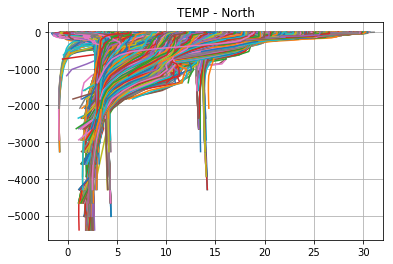

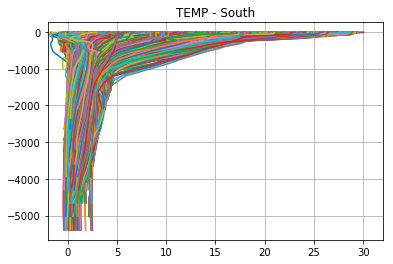

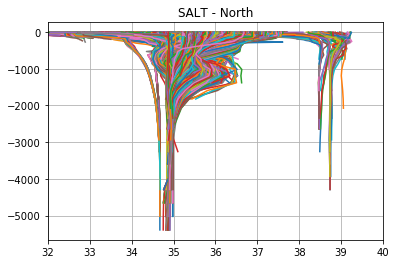

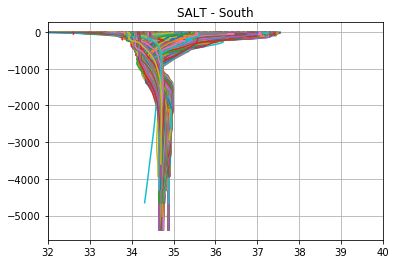

In [24]:
# plot of all north profiles

plt.close('all')

plt.figure()
plt.plot(temp_int_north, -z_besm)
plt.title('TEMP - North')
plt.grid()
plt.xlim(-2, 32)

plt.figure()
plt.plot(temp_int_south, -z_besm)
plt.title('TEMP - South')
plt.grid()
plt.xlim(-2, 32)

plt.figure()
plt.plot(salt_int_north, -z_besm)
plt.title('SALT - North')
plt.grid()
plt.xlim(32, 40)

plt.figure()
plt.plot(salt_int_south, -z_besm)
plt.title('SALT - South')
plt.grid()
plt.xlim(32, 40)

plt.show()

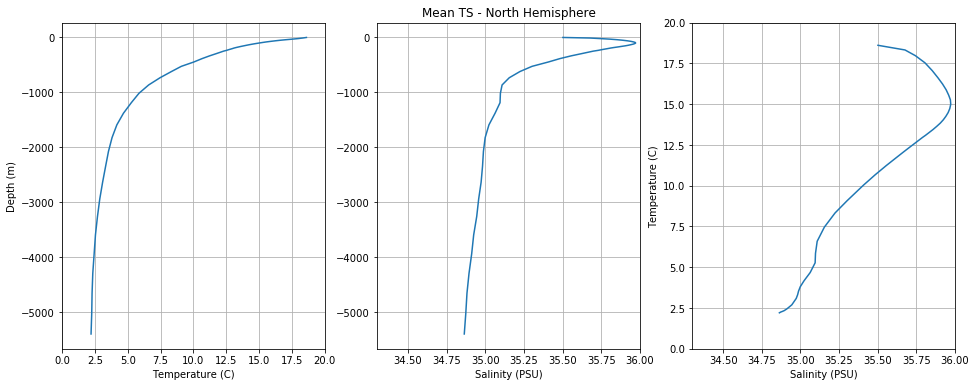

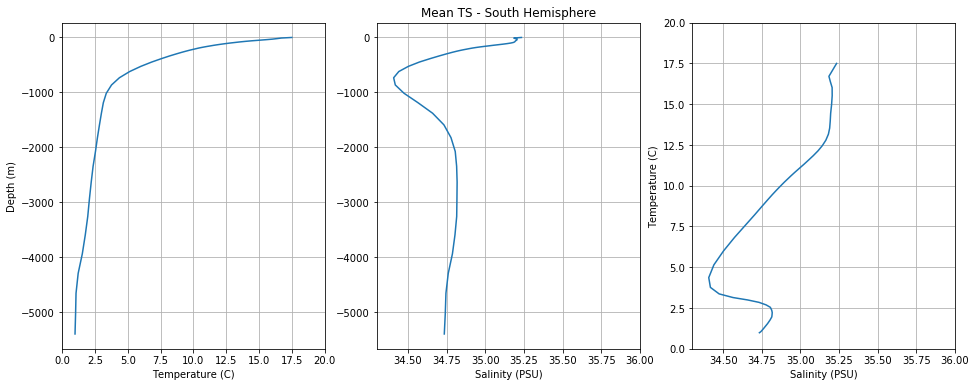

In [37]:
# mean TS north hemisphere

plt.figure(figsize=(16,6))

plt.subplot(131)
plt.plot(temp_mean_north, -z_besm)
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.grid()
plt.xlim(0,20)

plt.subplot(132)
plt.title('Mean TS - North Hemisphere')
plt.plot(salt_mean_north, -z_besm)
plt.xlabel('Salinity (PSU)')
plt.grid()
plt.xlim(34.3,36)

plt.subplot(133)
plt.plot(salt_mean_north, temp_mean_north)
plt.xlabel('Salinity (PSU)')
plt.ylabel('Temperature (C)')
plt.grid()
plt.xlim(34.3,36)
plt.ylim(0,20)

plt.figure(figsize=(16,6))

plt.subplot(131)
plt.plot(temp_mean_south, -z_besm)
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.grid()
plt.xlim(0,20)

plt.subplot(132)
plt.title('Mean TS - South Hemisphere')
plt.plot(salt_mean_south, -z_besm)
plt.xlabel('Salinity (PSU)')
plt.grid()
plt.xlim(34.3,36)

plt.subplot(133)
plt.plot(salt_mean_south, temp_mean_south)
plt.xlabel('Salinity (PSU)')
plt.ylabel('Temperature (C)')
plt.grid()
plt.xlim(34.3,36)
plt.ylim(0,20)

plt.show()